In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/dataset4/churn modelling.csv


In [3]:
df = pd.read_csv('/kaggle/input/dataset4/churn modelling.csv', index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['Surname'], axis=1, inplace=True)

In [5]:
df.shape

(10000, 12)

In [6]:
df.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [8]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [11]:
X.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'],
      dtype='object')

In [12]:
num_cols = ['CustomerId','CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_cols = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']

In [13]:
ct = ColumnTransformer([
    ('s1', RobustScaler(), num_cols),
    ('s2', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)
])

In [14]:
p = Pipeline([
    ('ct', ct),
    ('mod', LogisticRegression(random_state=0))
])

In [15]:
p.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('s1', RobustScaler(),
                                                  ['CustomerId', 'CreditScore',
                                                   'Age', 'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('s2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['HasCrCard',
                                                   'IsActiveMember',
                                                   'Geography', 'Gender'])])),
                ('mod', LogisticRegression(random_state=0))])

In [16]:
# predictions are for the default threshold of 0.5
preds = p.predict(X_test)
preds[:15]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [17]:
# real class labels of the first 15 people in the test set
np.array(y_test)[:15]

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_true=y_test, y_pred=preds)

array([[1529,   64],
       [ 319,   88]])

In [20]:
p.classes_

array([0, 1])

# If we want to switch the class label positions:



In [21]:
confusion_matrix(y_test, preds, labels=(1,0))

array([[  88,  319],
       [  64, 1529]])

In [22]:
confusion_matrix(y_test, preds, labels=(1,0)).ravel()

array([  88,  319,   64, 1529])

In [23]:
tp, fn, fp, tn = confusion_matrix(y_test, preds, labels=(1,0)).ravel()

In [24]:
precision = tp/(tp+fp)
precision

0.5789473684210527

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
fbeta_score, matthews_corrcoef

In [26]:
precision_score(y_test, preds)

0.5789473684210527

In [27]:
recall_score(y_test, preds)

0.21621621621621623

In [28]:
# harmonic mean of precision and recall
f1_score(y_test, preds)

0.31484794275491956

In [29]:
# Precision more weight than recall (beta < 1)
fbeta_score(y_test, preds, beta=0.5)

0.43349753694581283

In [30]:
# recall more weight than precision (beta > 1)
fbeta_score(y_test, preds, beta=2)

0.24719101123595508

In [31]:
# when both classes need to be predicted with good accuracies, MCC is better than F-measures
matthews_corrcoef(y_test, preds)

0.2674513400881277

In [32]:
from sklearn.metrics import SCORERS

In [33]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

## Plotting ROC & Precision-Recall Curves using sklearn functions

In [34]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [35]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test,preds)

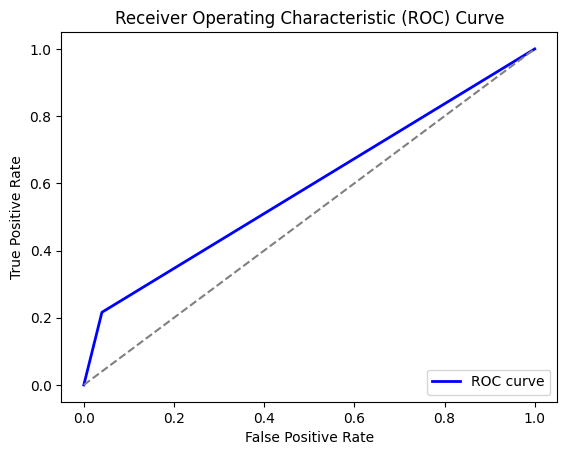

In [36]:
# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [37]:
y_test.value_counts()

Exited
0    1593
1     407
Name: count, dtype: int64

In [38]:
407/(1593+407)

0.2035

In [40]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [41]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test,preds)

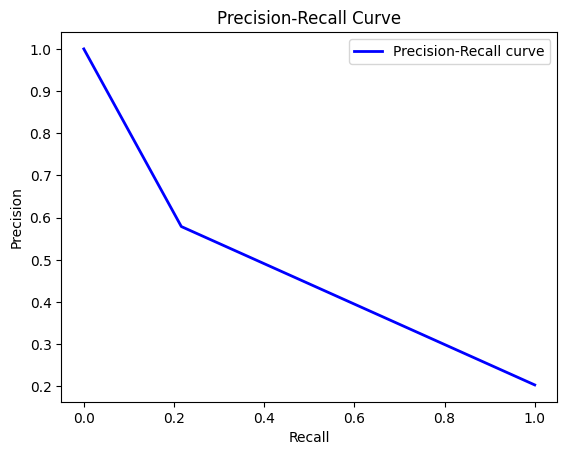

In [42]:
# Plot precision-recall curve
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()